### 0. Import packages
Load the necessary packages

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns 
import datetime 
import pickle

In [2]:
# Show plots in jupyter notebook
%matplotlib inline

In [3]:
# Set plot style
sns.set(color_codes=True)

In [4]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

### 1. Loading data
##### Data directory
Explicitly show how paths are indicated

In [5]:
train_data = pd.read_csv('ml_case_training_data.csv') 
history_data = pd.read_csv('ml_case_training_hist_data.csv') 
churn_data = pd.read_csv('ml_case_training_output.csv')

We will also print the first 5 rows to the screen. Just to see what the first dataset looks like

In [6]:
# Show first 3 rows
train_data.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


From above we can already see that there are a lot of NaN values. We will replace or remove those values later.
The first 5 rows of the dataframe also show us that there is numeric data and categorical data, which we will need to transform to the right form

In [7]:
churn_data.head(5)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


It seems the churn data is in the correct format as it shows 0 for not churned and 1 for churned

In [8]:
history_data.head(5)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


For the historic data, a lot of values are zeros

#### Combining two dataframes
We loaded data in two different pandas dataframes. Nonetheless, we might be interested in putting the data into a single dataframe to access it more easily. 
We can merge the two dataframes on a common column ( id ) using the function pd.merge() from pandas.

In [9]:
train = pd.merge(train_data, churn_data, on="id")

Let's take a look at the new train dataframe, this time at the last 10 rows.

In [10]:
train.tail(10)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16086,c3f4f737d598a1b47a94440bb18c3c06,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1097,0,0,2011-02-09,2016-02-09,NaN,2011-02-09,2015-02-11,NaN,NaN,NaN,NaN,165.60,0,0.0,16.04,0.146694,0.000000,44.311378,f,0.00,26.04,26.04,1,17.38,5,ldkssxwpmemidmecebumciepifcamkci,10.392,0
16087,ae818f3cc00ef5845416699aacc4bd7e,NaN,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,8310,0,685,2012-12-18,2016-12-18,NaN,2012-12-18,2015-12-21,NaN,NaN,NaN,NaN,833.05,685,0.0,131.76,0.115237,0.100123,40.939027,f,67.03,24.02,24.02,1,102.52,3,kamkkxfxxuwbdslkwifmmcsiusiuosws,23.100,0
16088,1582ef35fbfa265e60bb3399bdebac87,fcdfsumaxdslpwpxekaxasfuffeakxca,NaN,NaN,9441,0,480,2009-10-08,2016-10-08,NaN,2015-05-24,2015-10-09,NaN,NaN,NaN,NaN,983.97,480,0.0,132.11,0.115237,0.100123,40.939027,f,46.98,20.00,20.00,1,113.17,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0
16089,46362cb1ad2fcdad347a6fa1bc1e5d4b,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,18163,3036,0,2010-01-26,2017-01-26,NaN,2015-11-17,2016-01-27,NaN,NaN,NaN,NaN,2663.82,0,0.0,16.35,0.143575,0.000000,44.311378,t,0.00,31.20,31.20,3,254.81,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
16090,c49217f16a06263e5381eaba94a67a8b,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,87146,0,11367,2013-02-08,2016-02-08,2013-02-08,2013-02-08,2015-02-09,255.15,255.15,2550.54,71.81,712.33,713,0.0,145.82,0.120372,0.103487,40.606701,f,71.81,66.00,66.00,1,87.14,3,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,2015-05-08,2014-05-26,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2012-08-27,2015-08-28,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,2012-02-08,2015-02-09,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,2012-08-30,2015-08-31,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,2009-12-18,2015-12-21,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


### 2. General statistics of a dataframe
#### Data types
Often, it is useful to understand what data we are dealing with, as the data types might end up causing errors into our analysis at a later stage. Below, we can quickly see the dates in our dataset are not datetime types yet, which means we might need to convert them. In addition, we can
see that the churn is full of integers so we can keep it in that form.

* Note: We've transformed the output to a dataframe to facilitate visualization

In [11]:
pd.DataFrame({"Data type":train.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [12]:
pd.DataFrame({"Data type":history_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


#### Dataframe statistics
Let's also look at the basic statistics of the data.

In [13]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


From above we can obtain a lot of information about the dataset we are dealing with. Some key facts include:
            
            1. The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative.
            This could mean that the client companies are producing energy and therefore energy should be 
            "returned", although it is unlikely and we will consider it as corrupted data.
            
            2. The campaign_disc_ele is an empty column. We verify it by running 
            train["campaign_disc_ele"].isnull().values.all()
            
            3. Highly skewed data when we look at the percentiles.

In [14]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


For this dataset, it looks overall good.

We might be a bit concerned about the negative values in the fix price column. One more time, this might be corruped data and we will change them to positive when cleaning the data.

#### Missing data
We are also concerned we have a lot of missing data so we can check how much of our data is missing.

* Note: We've transformed the output to a dataframe to facilitate visualization. This will be used for data cleaning in the next exercise.

In [15]:
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


Some of the columns might need to be removed since they have more than 75% of the data missing

In [16]:
pd.DataFrame({"Missing values (%)": history_data.isnull().sum()/len(history_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In this case the missing data is very small, so we might be able to easily replace the missing values with approximations

### 3. Data visualization
Deep diving a little bit on the main parameters

#### Churn
Let's see the churning rate

In [17]:
churn = train[["id","churn"]]

In [18]:
# Rename columns for visualization purposes
churn.columns = ["Companies", "churn"]

In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"): 
    """
    Plot stacked bars with annotations """
    ax = dataframe.plot(kind="bar",
                        stacked=True,
                        figsize=size_,
                        rot=rot_,
                        title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_) 
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13): 
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars 
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1)) 
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                        ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                    )

In [20]:
churn_total = churn.groupby(churn["churn"]).count() 
churn_percentage = churn_total/churn_total.sum()*100

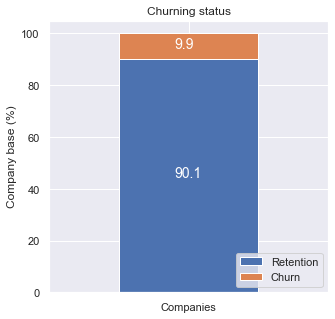

In [21]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

About 10% of the of total customers have churned. (This sounds about right)

#### SME activity
Let's show the activity distribution of the companies as well as the sales channel. 
Intuitively this might be an important predictive feature for energy consumption

In [22]:
activity = train[["id","activity_new", "churn"]]

In [23]:
activity = activity.groupby([activity["activity_new"], 
                             activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

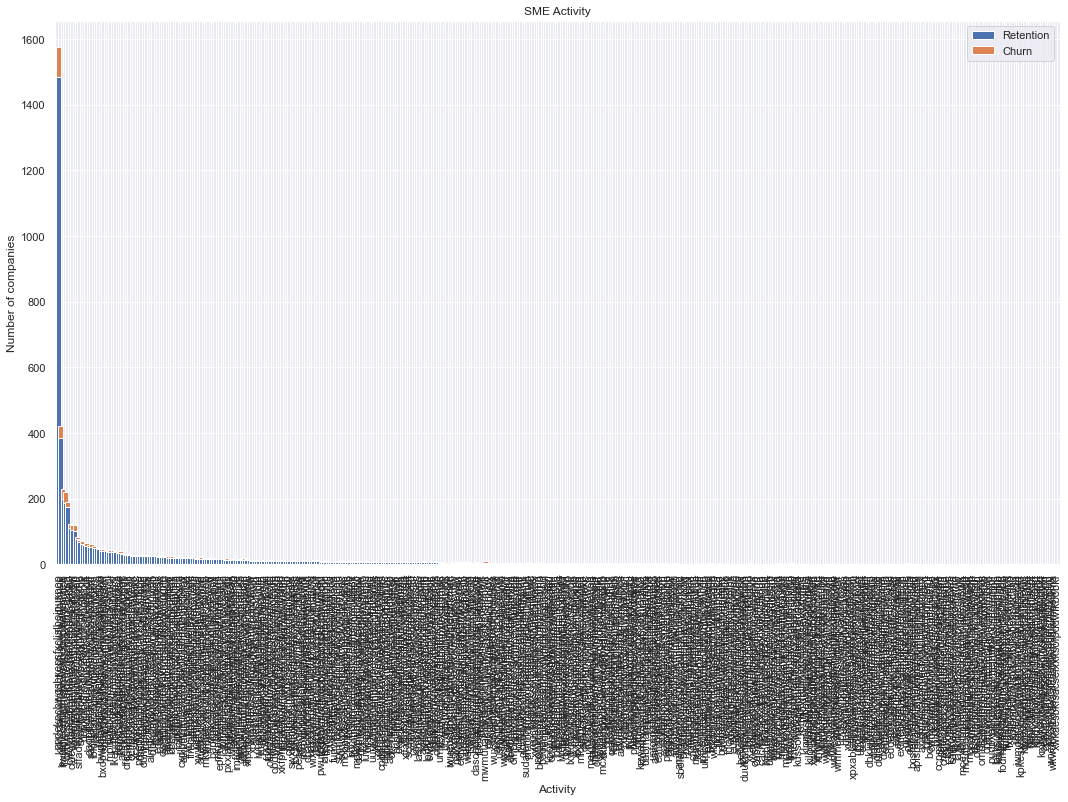

In [24]:
activity.plot(kind="bar", 
              figsize=(18, 10),
              width=2, 
              stacked=True, 
              title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet plt.xticks([])
plt.show()

The distribution of the classes over the labeled data despite the lack of 60% of the entries. We see churn is not specifically related to any SME cateogry in particular.
* Note: Not showing the labels in the x-axis to facilitate visualization

If we take a look at the values percentage-wise

In [25]:
activity_total = activity.fillna(0)[0]+activity.fillna(0)[1] 
activity_percentage = activity.fillna(0)[1]/(activity_total)*100 
pd.DataFrame({"Percentage churn": activity_percentage,
              "Total companies": activity_total }).sort_values(by="Percentage churn", 
                                                               ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


If sorted by activity some companies have churned a 100% but this is due to the fact that only a few companies belong to that activity.

##### How will the SME activity influence our predictive model?
Our predictive model is likely to struggle accurately predicting the the SME activity due to the large number of categories and low number of companies belonging to each category.

##### Sales channel
The sales channel seems to be an important feature when predecting the churning of a user. 
It is not the same if the sales were through email or telephone.

In [26]:
channel = train[["id","channel_sales", "churn"]]

In [27]:
channel = channel.groupby([channel["channel_sales"], 
                           channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [28]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

We will plot the categories, despite the fact that data is available for only 75% of the dataset.

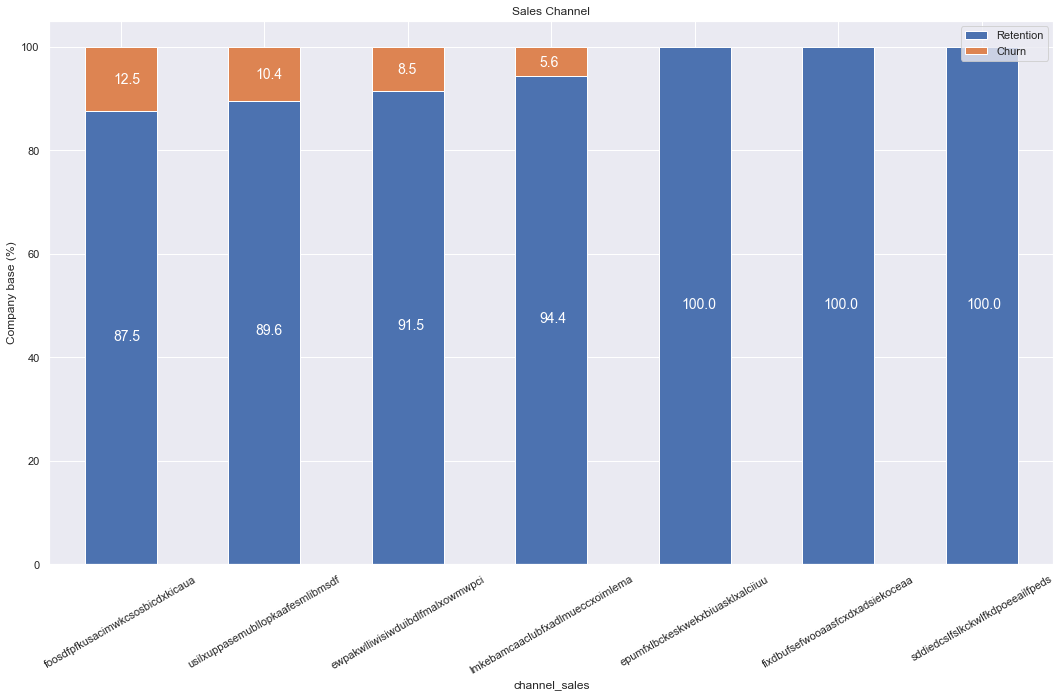

In [29]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

Nothing out of the normal form this graph above.

If we look at it percentage-wise

In [30]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1] 
channel_percentage = channel.fillna(0)[1]/(channel_total)*100 
pd.DataFrame({"Churn percentage": channel_percentage,
              "Total companies": channel_total }).sort_values(by="Churn percentage", 
                                                              ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


#### Consumption
Let's see the distribution of the consumption over the last year and last month


In [31]:
consumption = train[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]

The most straight forward to visualise and identify the distribution of uni-variate data is through histograms

In [32]:
def plot_distribution(dataframe, column, ax, bins_=50): 
    """
    Plot variable distirbution in a stacked histogram of churned or retained company 
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                     "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True) 
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

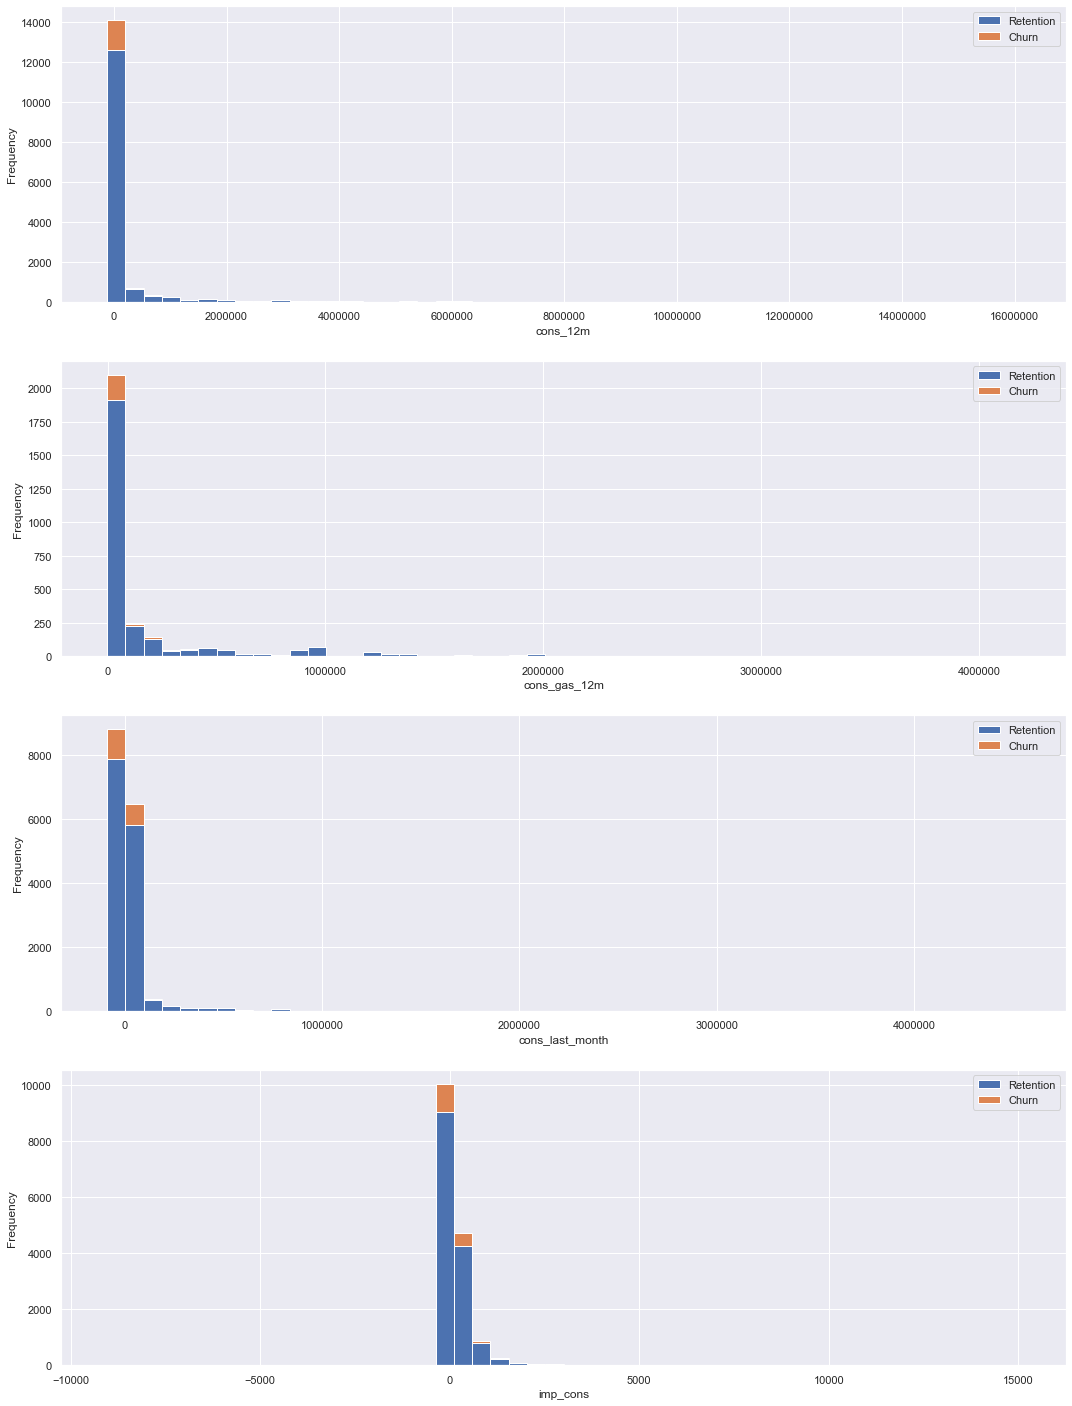

In [33]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract 
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1]) 
plot_distribution(consumption, "cons_last_month", axs[2]) 
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution.

The values on the higher end and lower ends of the distribution are likely to be outliers.
We can use a standard plot to visualise the outliers in more detail. 
A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
It can tell us about our outliers and what their values are. 
It can also tell us if our data is symmetrical, how tightly our data is grouped, and if and how our data is skewed.

/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

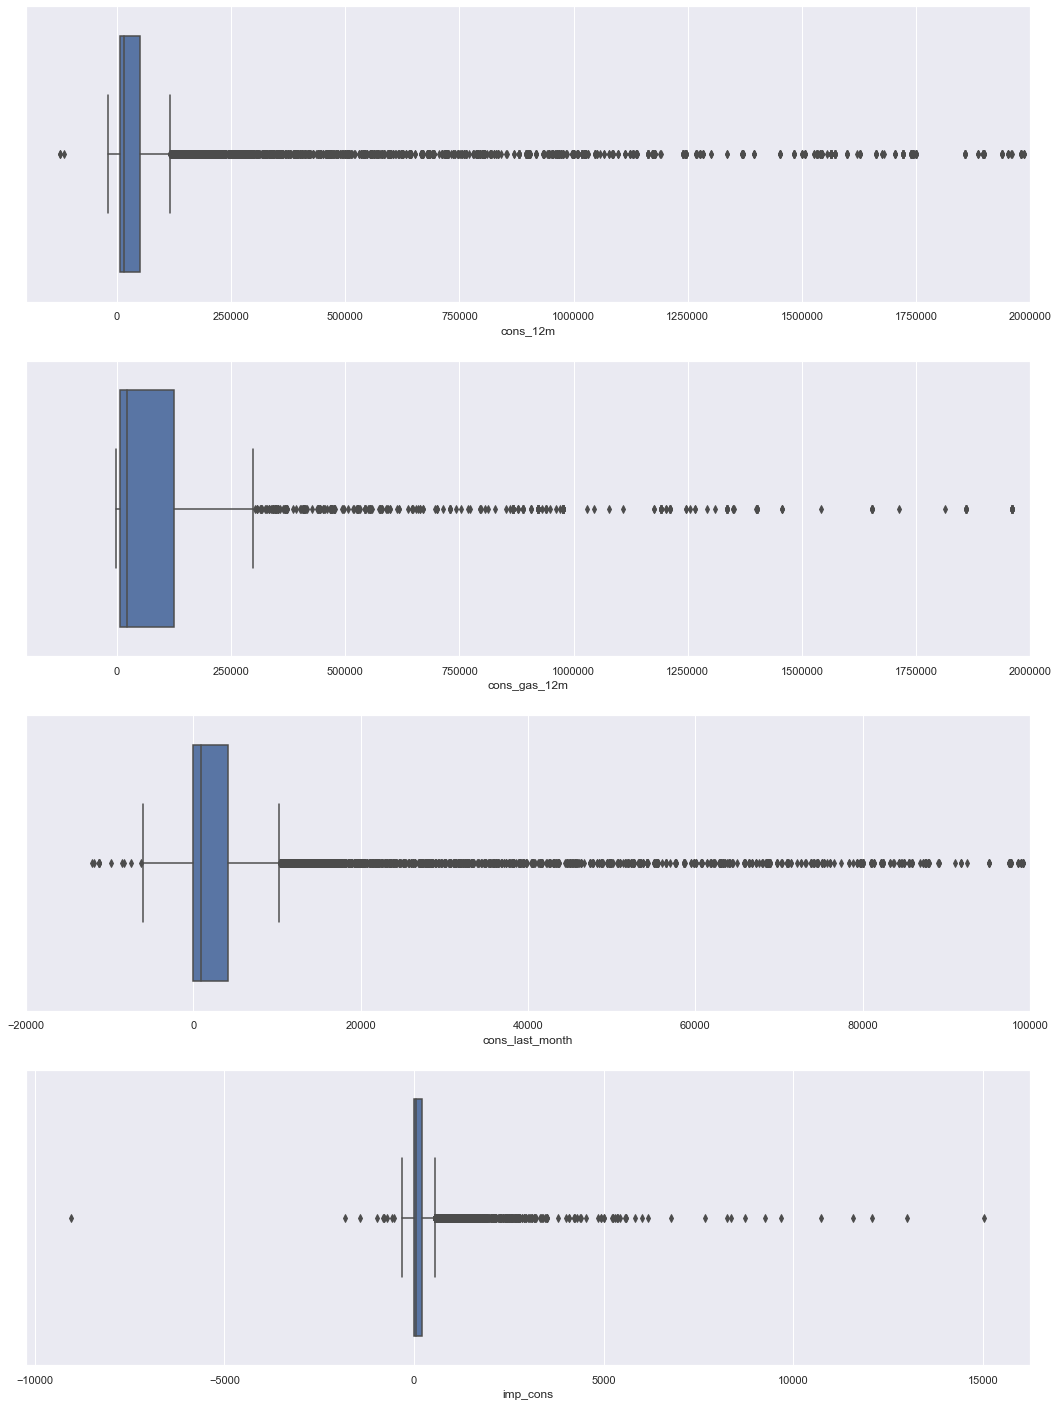

In [34]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0]) 
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1]) 
sns.boxplot(consumption["cons_last_month"], ax=axs[2]) 
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs: 
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000) 
axs[1].set_xlim(-200000, 2000000) 
axs[2].set_xlim(-20000, 100000) 
plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers. We will deal with the skewness and outliers in the next exercise ( Data cleaning )

#### Dates

In [35]:
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [36]:
# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d') 
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d') 
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d') 
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [37]:
def plot_dates(dataframe, column, fontsize_=12): 
    """
    Plot monthly churn and retention distribution 
    """
    # Group by month
    temp = dataframe[[column,
                      "churn",
                      "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0) 
    # Change x-axis labels to months 
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    plt.show()
    
def line_format(label): 
    """
    Convert time label to the format of pandas line plot 
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}' 
        return month

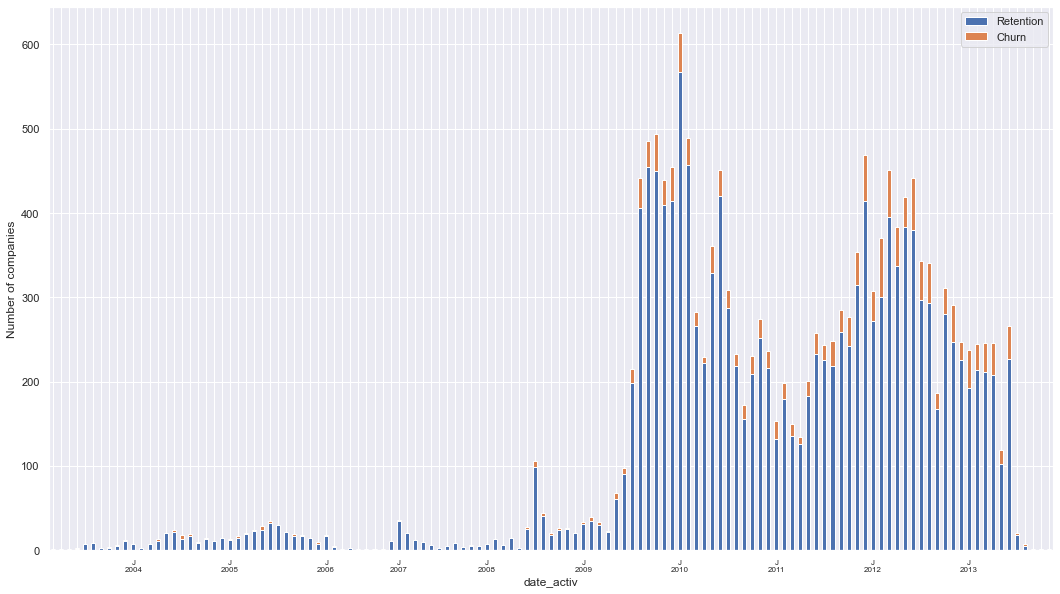

In [38]:
plot_dates(dates, "date_activ", fontsize_=8)

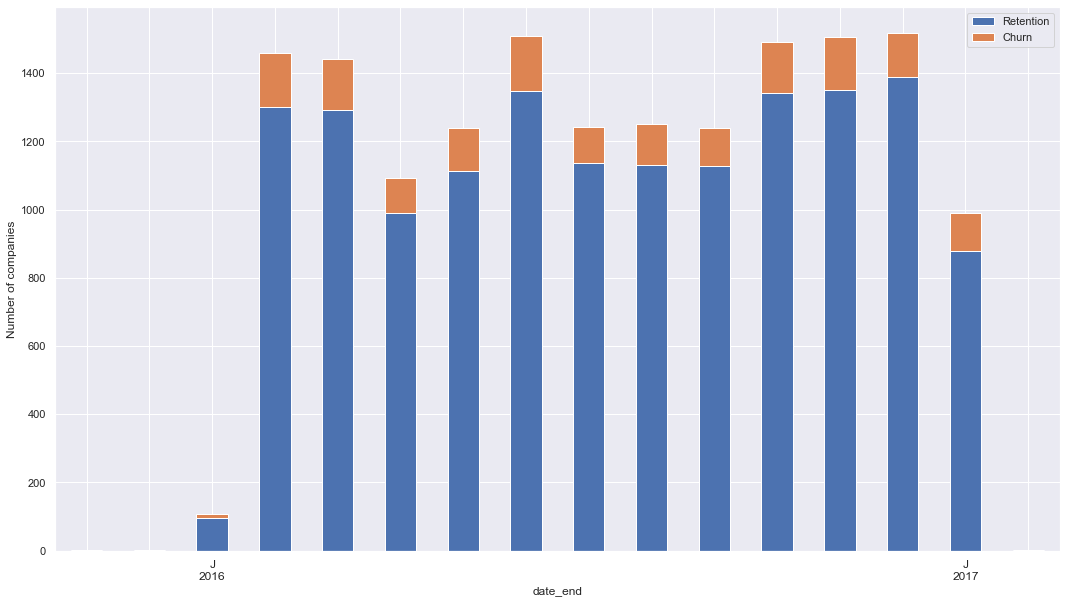

In [39]:
plot_dates(dates, "date_end")

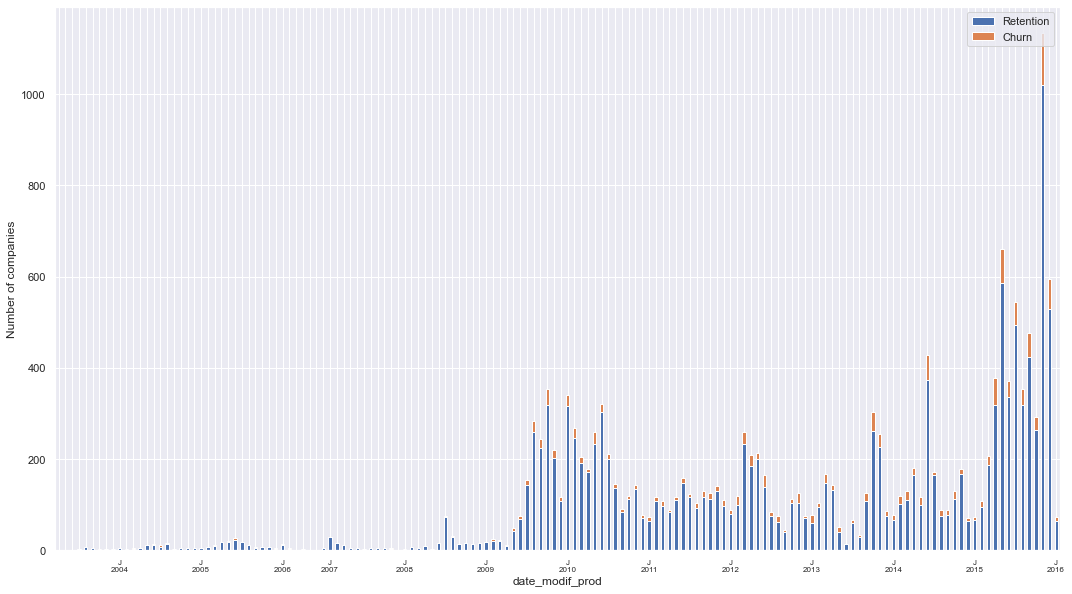

In [40]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

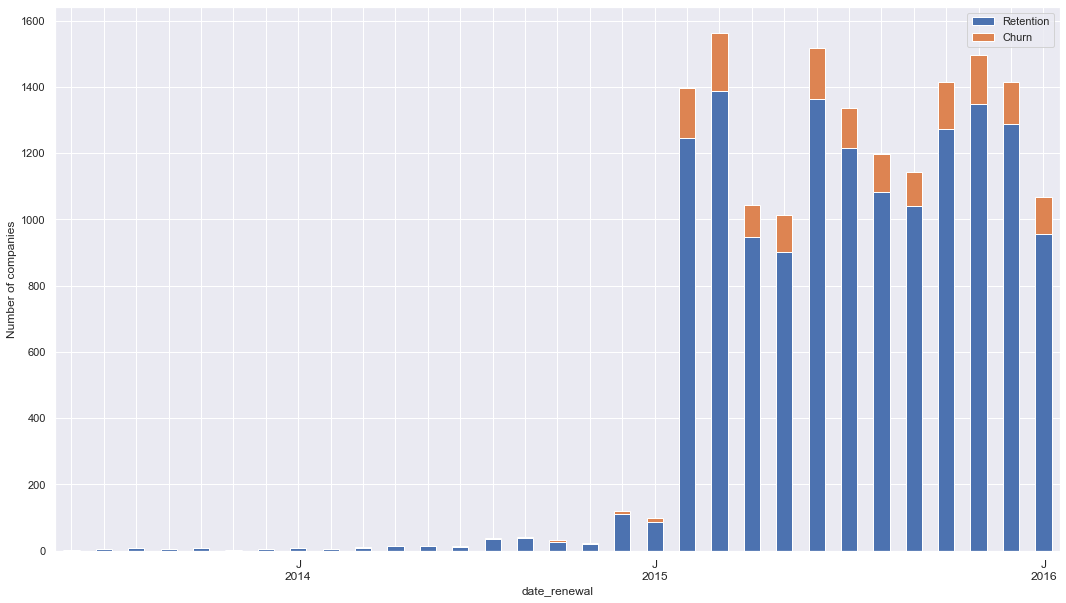

In [41]:
plot_dates(dates, "date_renewal")

As a remark in here, we can visualize the distribution of churned companies according to the date. However, this does not provide us with any useful insight. We will create a new feature using the raw dates provided in the next exercise.

#### Forecast

In [42]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year", 
                  "forecast_bill_12m","forecast_cons","forecast_cons_12m",
                 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
                 "forecast_price_energy_p1","forecast_price_energy_p2",
                 "forecast_price_pow_p1","churn"]]

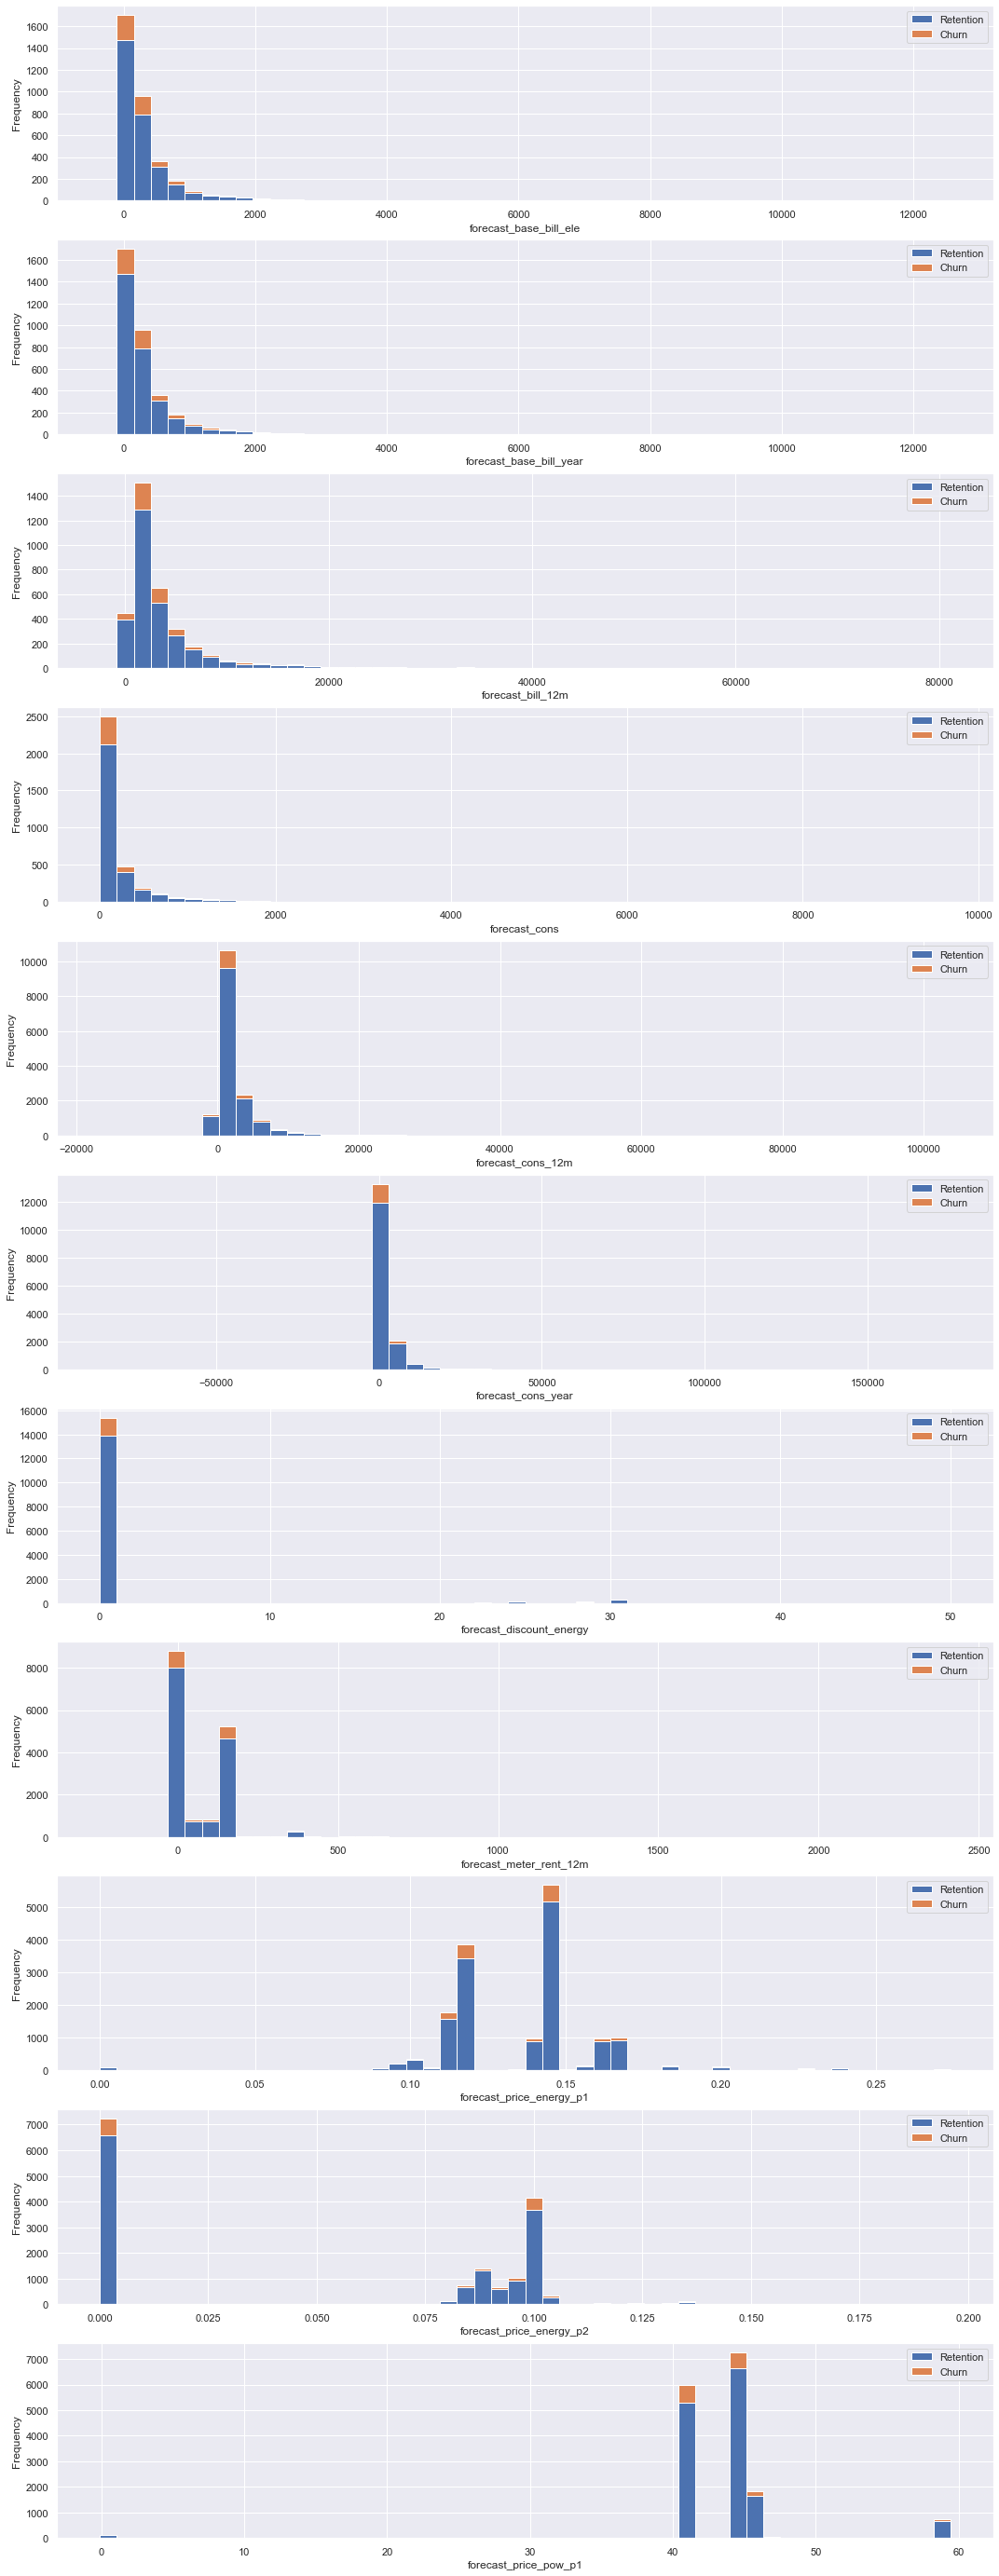

In [43]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(train, "forecast_base_bill_ele", axs[0]) 
plot_distribution(train, "forecast_base_bill_year", axs[1]) 
plot_distribution(train, "forecast_bill_12m", axs[2]) 
plot_distribution(train, "forecast_cons", axs[3]) 
plot_distribution(train, "forecast_cons_12m", axs[4]) 
plot_distribution(train, "forecast_cons_year", axs[5]) 
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7]) 
plot_distribution(train, "forecast_price_energy_p1", axs[8]) 
plot_distribution(train, "forecast_price_energy_p2", axs[9]) 
plot_distribution(train, "forecast_price_pow_p1", axs[10])

Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values.

We will make some transformations to correct for this skewness

#### Contract type (electricity, gas)

In [44]:
contract_type = train[["id", "has_gas", "churn"]]

In [45]:
contract = contract_type.groupby([contract_type["churn"], 
                                  contract_type["has_gas"]])["id"].count().unstack(level=0)

In [46]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

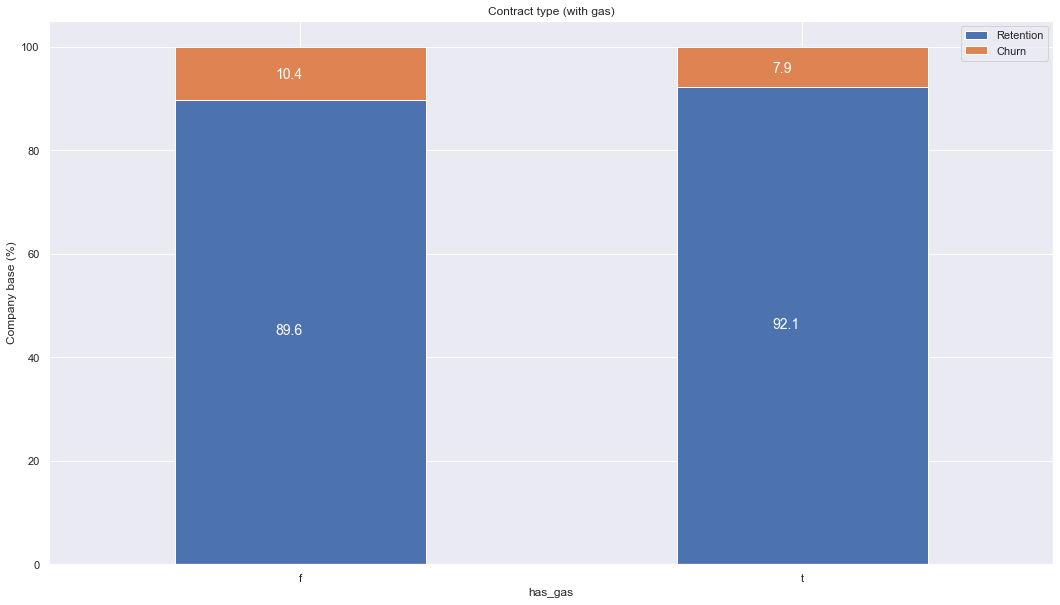

In [47]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

#### Margins

In [48]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

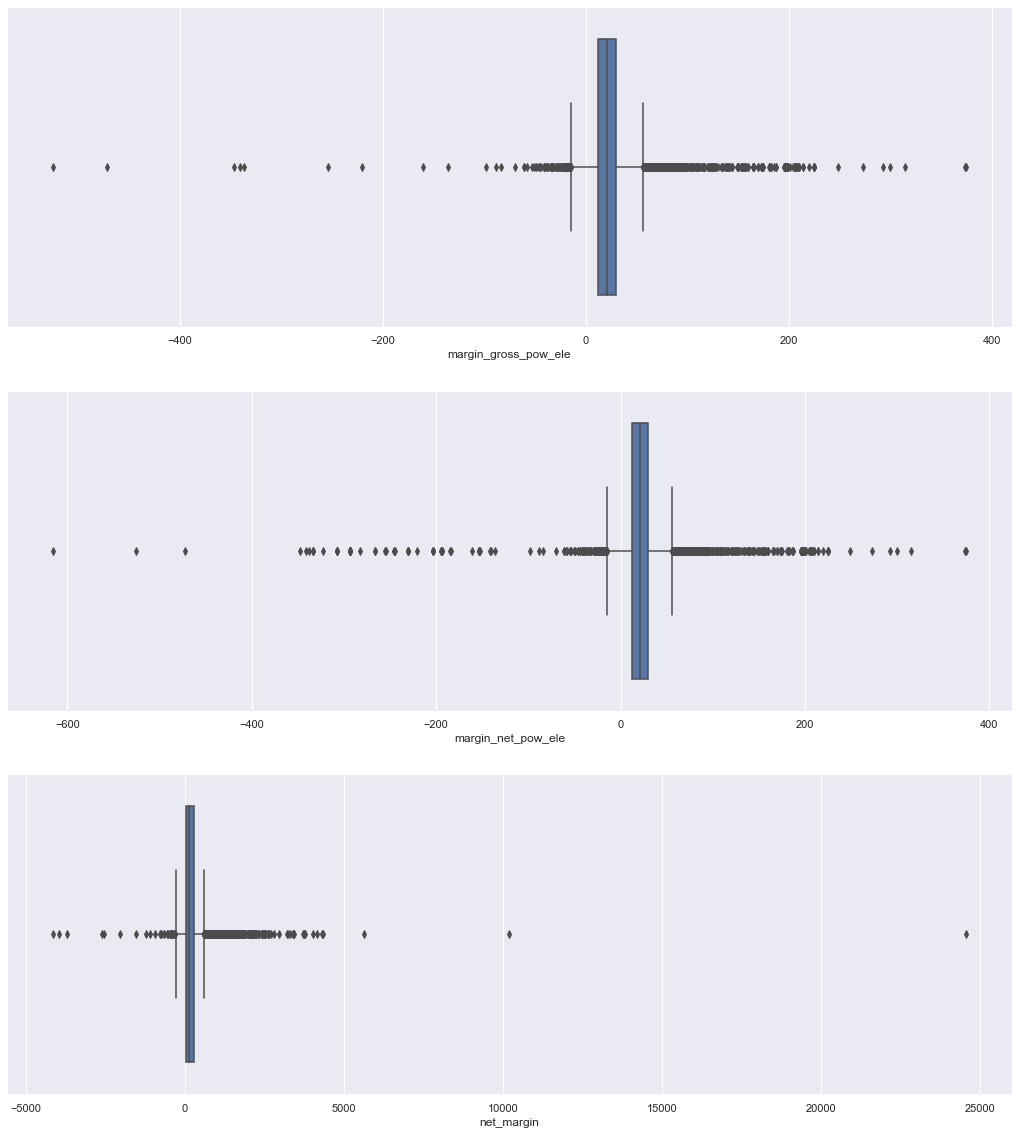

In [49]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram 
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0]) 
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1]) 
sns.boxplot(margin["net_margin"], ax=axs[2])

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x') 
axs[1].ticklabel_format(style='plain', axis='x') 
axs[2].ticklabel_format(style='plain', axis='x') 
plt.show()

We can observe a few outliers in here as well.

#### Subscribed power

In [50]:
power = train[["id","pow_max", "churn"]].fillna(0)

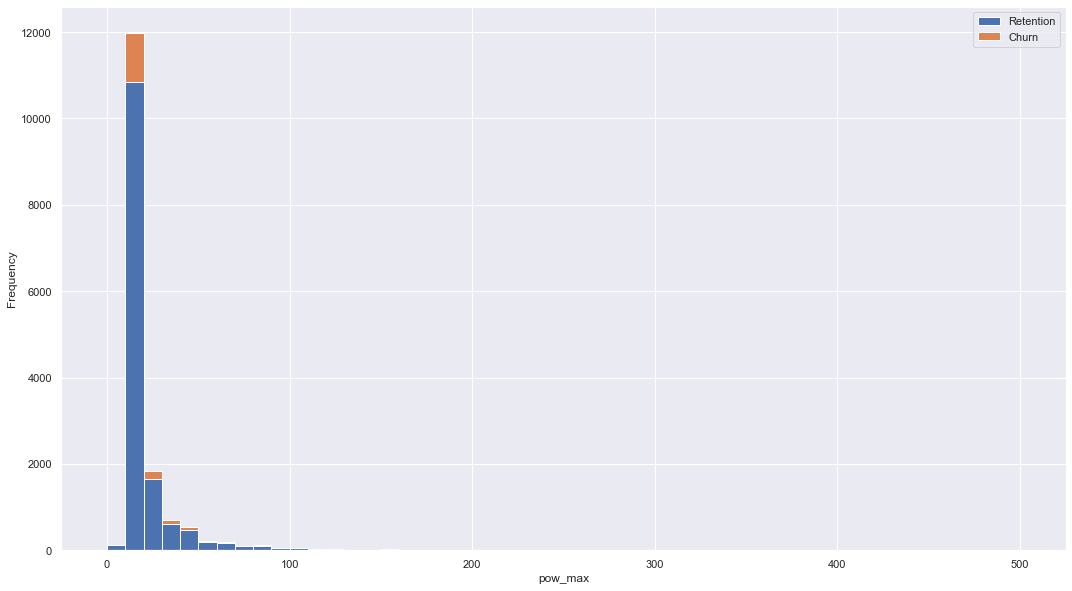

In [51]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10)) 
plot_distribution(power, "pow_max", axs)

#### Others

In [52]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

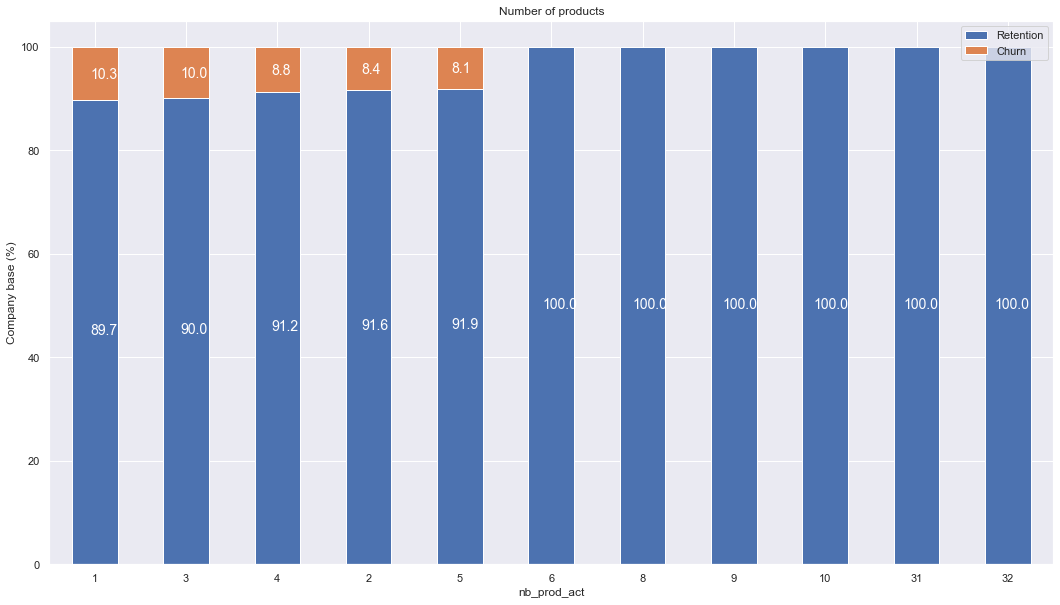

In [53]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1) 
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False) 
plot_stacked_bars(products_percentage, "Number of products")

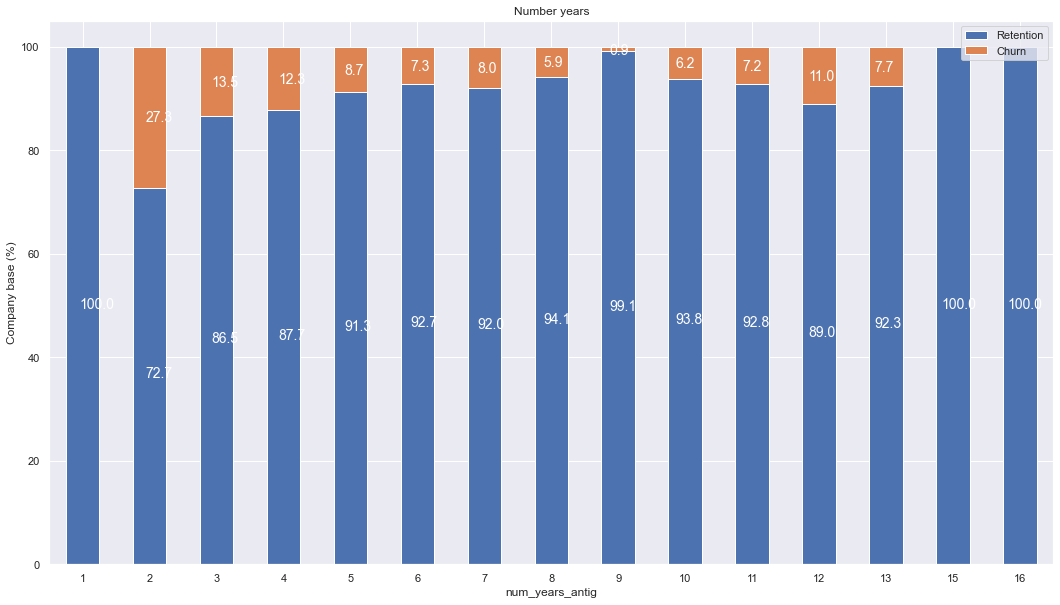

In [54]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1) 
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100) 
plot_stacked_bars(years_antig_percentage, "Number years")

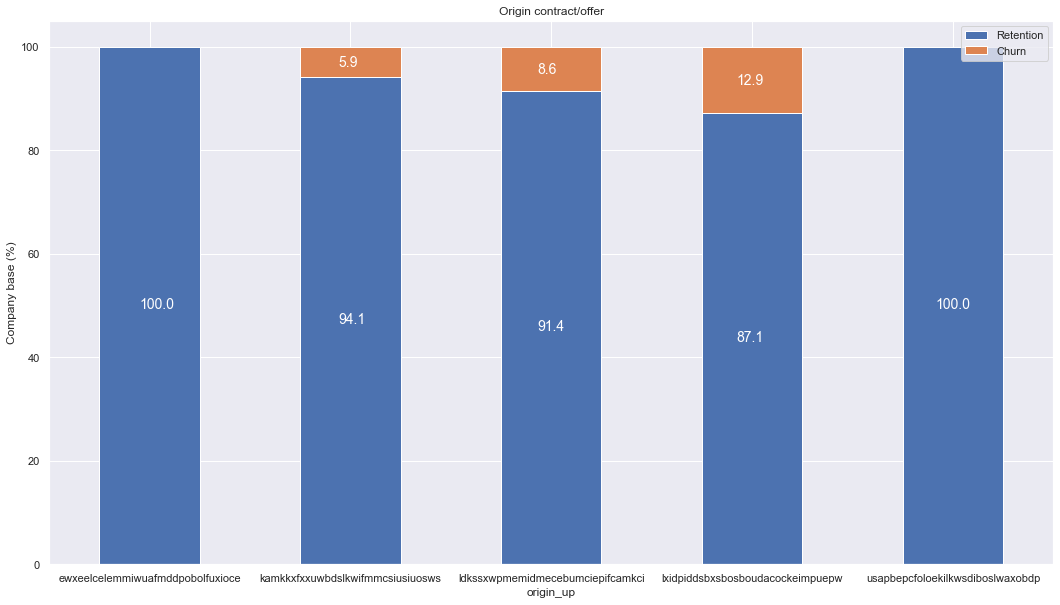

In [55]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1) 
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100) 
plot_stacked_bars(origin_percentage, "Origin contract/offer")

### 4. Data cleaning 

#### Missing data

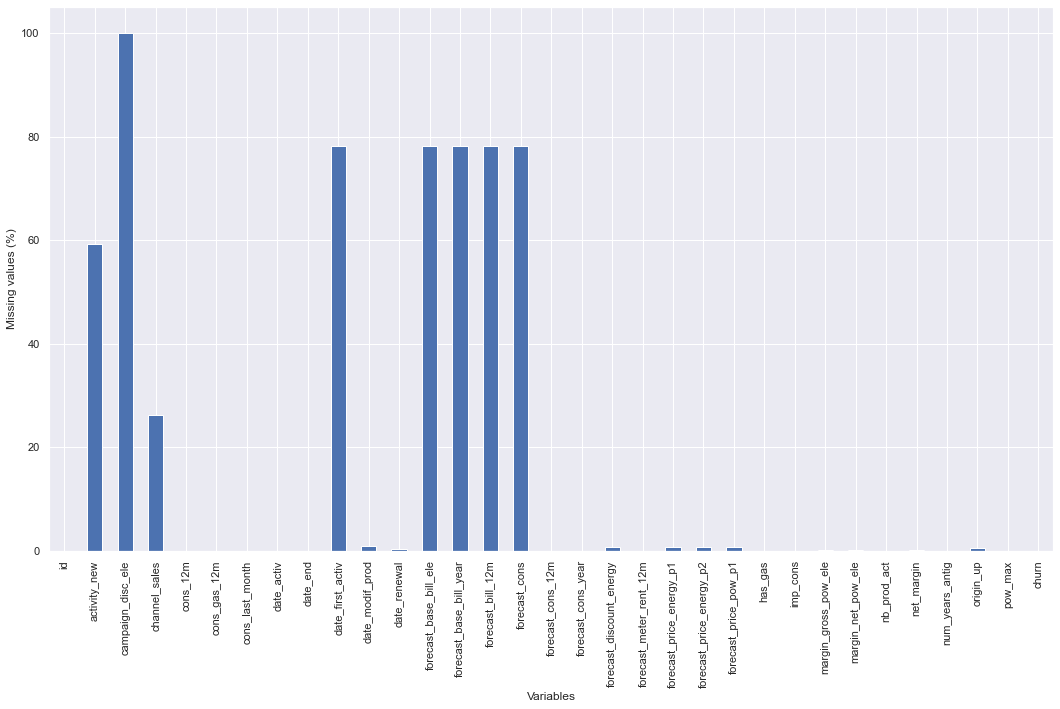

In [56]:
# Plot missing data
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

For simplicity we will remove the variables with more than 60% of the values missing. 

*We might re-use some of these variables if our model is not good enough.

In [57]:
train.drop(columns=["campaign_disc_ele", "date_first_activ", 
                    "forecast_base_bill_ele","forecast_base_bill_year",
                    "forecast_bill_12m", "forecast_cons"], inplace=True)

Notice how the columns that we removed do not appear in the dataframe anymore.
* Note: Showing the columns as a separate dataframe to facilitate visualization

In [58]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


#### Duplicates
We want to make sure all the data we have is unique and we don't have any duplicated rows. For that, we're going to use the .duplicated() function in pandas.
This will tell us if there are any duplicated rows.

In [59]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


### 5. Formatting data
#### Missing dates
There could be several ways in which we could deal with the missing dates.
One way, we could "engineer" the dates from known values. For example, the date_renewal is usually the same date as the date_modif_prod but one year ahead.
The simplest way, we will replace the missing values with the median (the most frequent date). For numerical values, the built-in function .median() can be used, but this will not work for dates or strings, so we will use a workaround using .value counts()

In [60]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0] 
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0] 
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

#### Missing data
We might have some prices missing for some companies and months

In [61]:
missing_data_percentage = history_data.isnull().sum()/len(history_data.index)*100

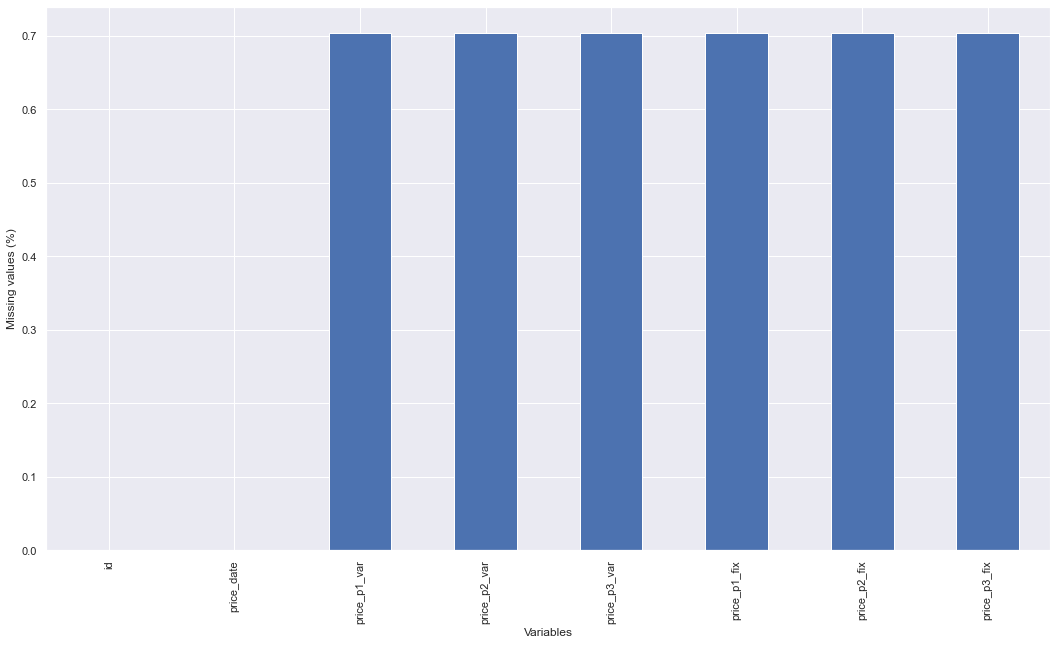

In [62]:
missing_data_percentage.plot(kind="bar", figsize=(18,10)) 
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

There is not much data missing. Instead of removing the entries that are empty we will simply substitute them with the median .
* Note: We could use something slightly more complicated such as using the mean of the previous and following months to calculate the value of the missing month since the data does not vary much.

In [63]:
history_data[history_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
history_data.loc[history_data["price_p1_var"].isnull(),"price_p1_var"] = history_data["price_p1_var"].median() 
history_data.loc[history_data["price_p2_var"].isnull(),"price_p2_var"] = history_data["price_p2_var"].median() 
history_data.loc[history_data["price_p3_var"].isnull(),"price_p3_var"] = history_data["price_p3_var"].median() 
history_data.loc[history_data["price_p1_fix"].isnull(),"price_p1_fix"] = history_data["price_p1_fix"].median() 
history_data.loc[history_data["price_p2_fix"].isnull(),"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"].isnull(),"price_p3_fix"] = history_data["price_p3_fix"].median()

#### Formatting dates (train data)
In order to use the dates in our churn prediction model we are going to change the representation of these dates. Instead of using the date itself, we will be transforming it in number of months. In order to make this transformation we need to change the dates to datetime and create a
reference date which will be January 2016 (see notes) 
* Note: See more information in the feature engineering notebook

In [65]:
# Transform date columns to datetime type
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d') 
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d') 
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d') 
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

#### Formating dates (history data)

In [66]:
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format='%Y-%m-%d')

/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/tolulope_o/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

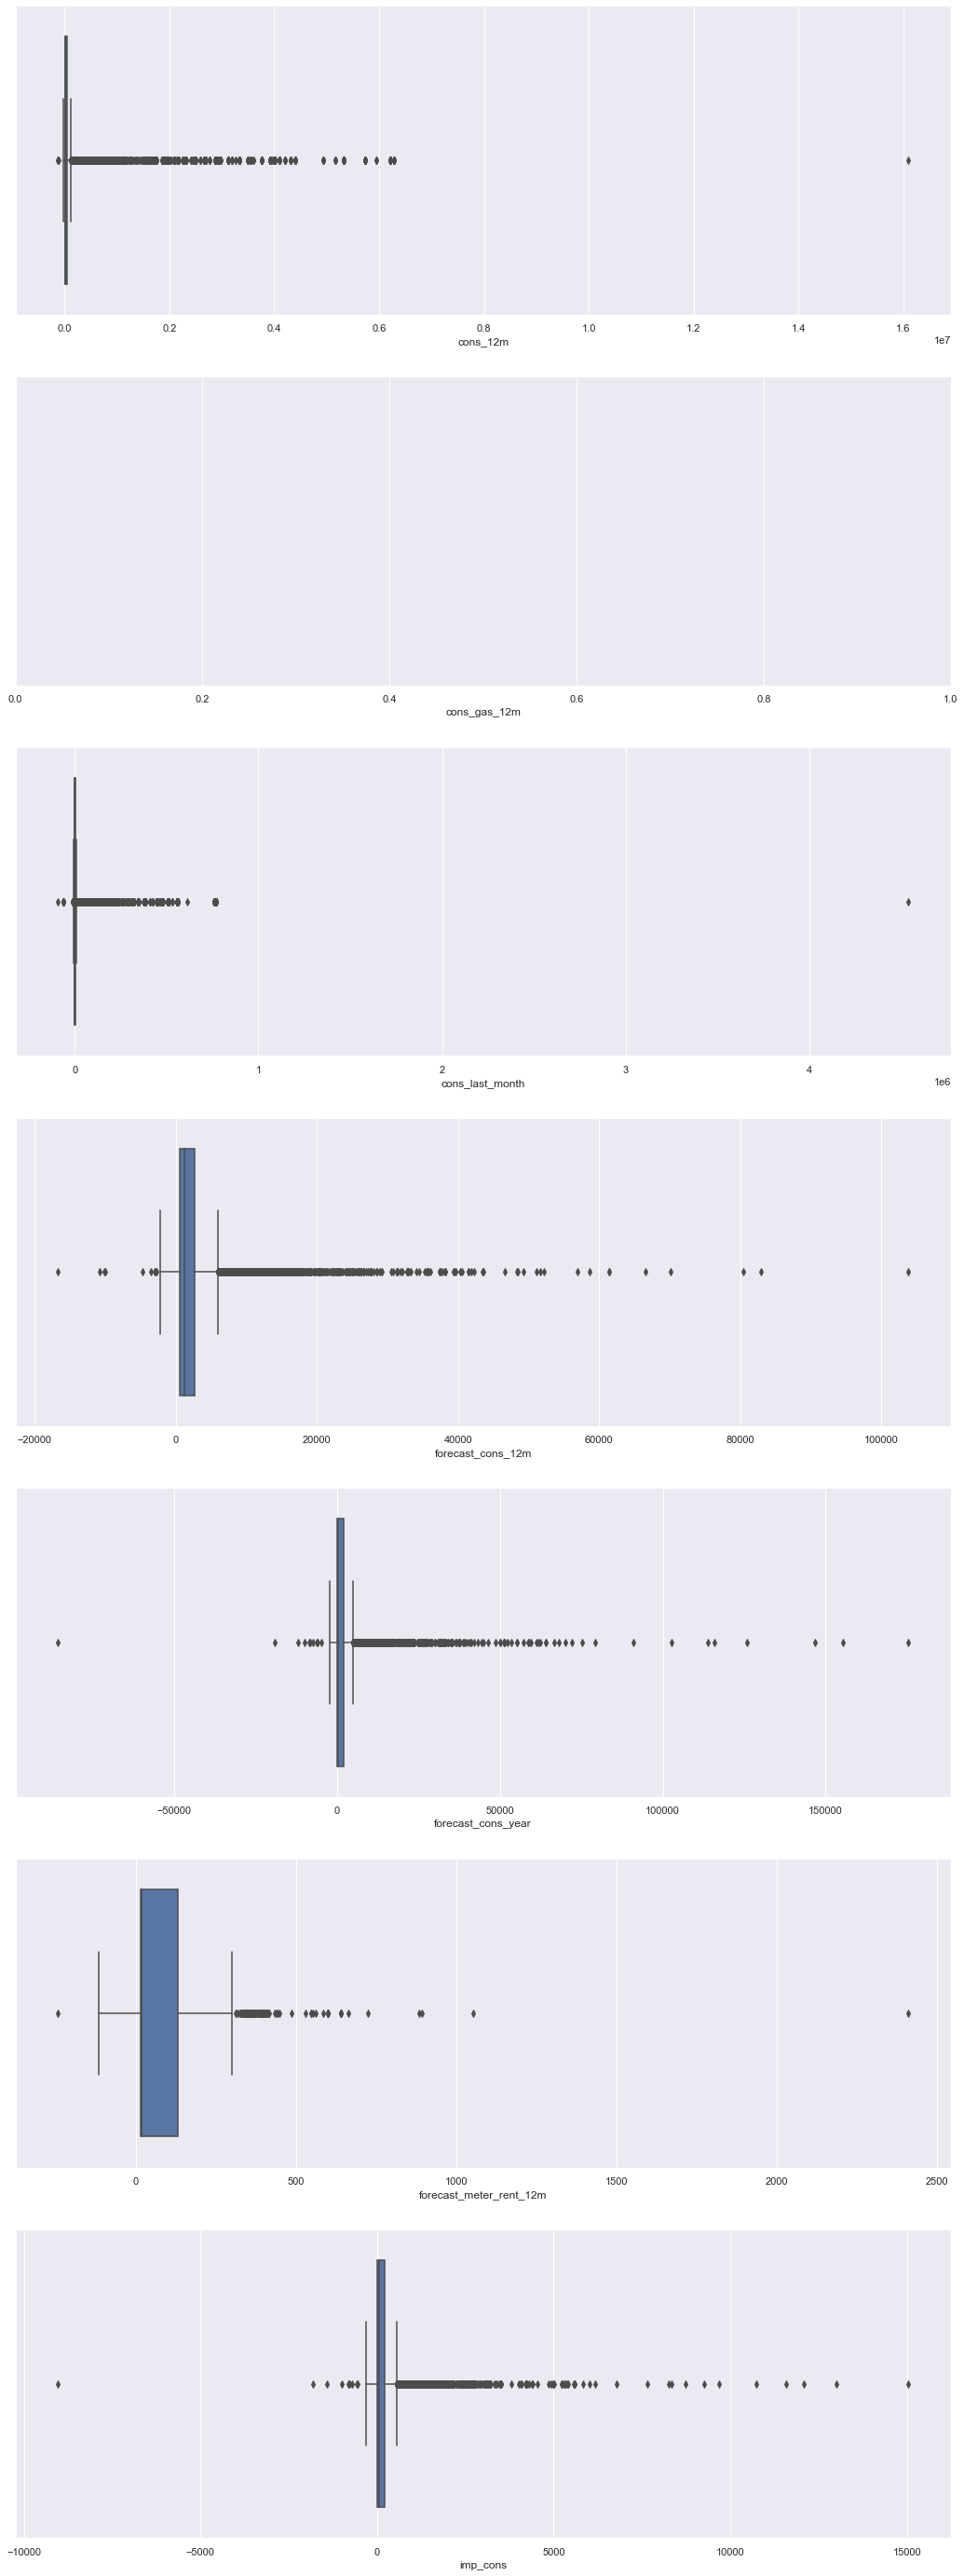

In [67]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0]) 
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2]) 
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) 
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

 #### Negative data
 Let's take a look a the historical price data.

In [68]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than
a "price discount".

We will replace the negative values with the median (most frequent value)

In [69]:
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [70]:
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median() 
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median() 
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

### 8. Pickling
Pickling is useful for applications where we need some degree of persistency in our data. Our program's state data can be saved to disk, so we can continue working on it later on.

Make directory processed_data if it does not exist already

In [71]:
train.to_pickle('train_data.pkl')
history_data.to_pickle('history_data.pkl')